### Import Libraries

In [5]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Add the project root directory to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if project_root not in sys.path:
    sys.path.append(project_root)

# Import functions from data_preprocessing.py
from src.data_preprocessing import load_data, check_data, clean_data

### Load Data

In [6]:
# Define the file path
file_path = '../data/BrentOilPrices.csv'

# Load the data
data = load_data(file_path)

# Display the first few rows of the dataframe
data.head()

d:\brent-oil-analysis\src\data_preprocessing.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(file_path, parse_dates=['Date'], dayfirst=True)


Data loaded successfully


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


### Check Data Types and Missing Values

In [7]:
# Check data types and missing values
check_data(data)

Data types:
 Date     datetime64[ns]
Price           float64
dtype: object

Missing values in each column:
 Date     0
Price    0
dtype: int64


### Clean Data

In [8]:
# Clean the data
data_clean = clean_data(data)

Missing values removed
Index reset


In [9]:
# Display the first few rows of the cleaned dataframe
data_clean.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


## Exploratory Data Analysis (EDA)

### Summary Statistics

In [10]:
# Get summary statistics of the data
data_clean.describe()

,Date,Price
count,9011,9011.000000
mean,2005-02-10 23:46:53.760958720,48.420782
min,1987-05-20 00:00:00,9.100000
25%,1996-03-20 12:00:00,19.050000
50%,2005-02-02 00:00:00,38.570000
75%,2014-01-09 12:00:00,70.090000
max,2022-11-14 00:00:00,143.950000
std,NaN,32.860110


### Time Series Plot

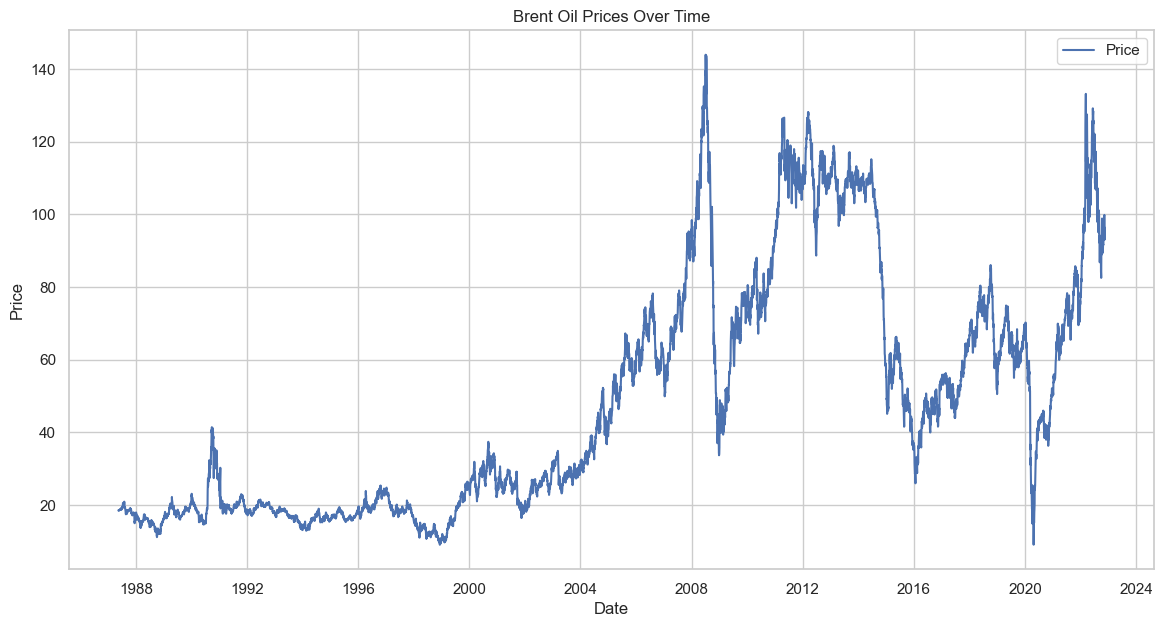

In [11]:
# Plot Brent oil prices over time
plt.figure(figsize=(14, 7))
plt.plot(data_clean['Date'], data_clean['Price'], label='Price')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Distribution Plot

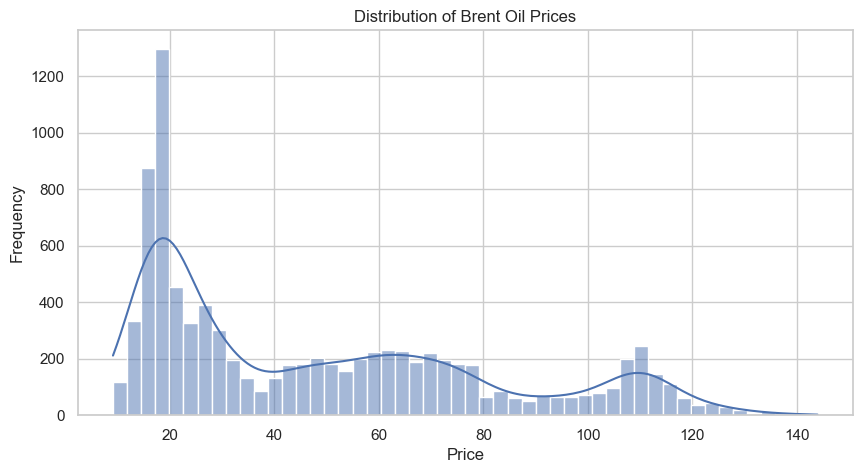

In [12]:
# Plot the distribution of Brent oil prices
plt.figure(figsize=(10, 5))
sns.histplot(data_clean['Price'], bins=50, kde=True)
plt.title('Distribution of Brent Oil Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Moving Average

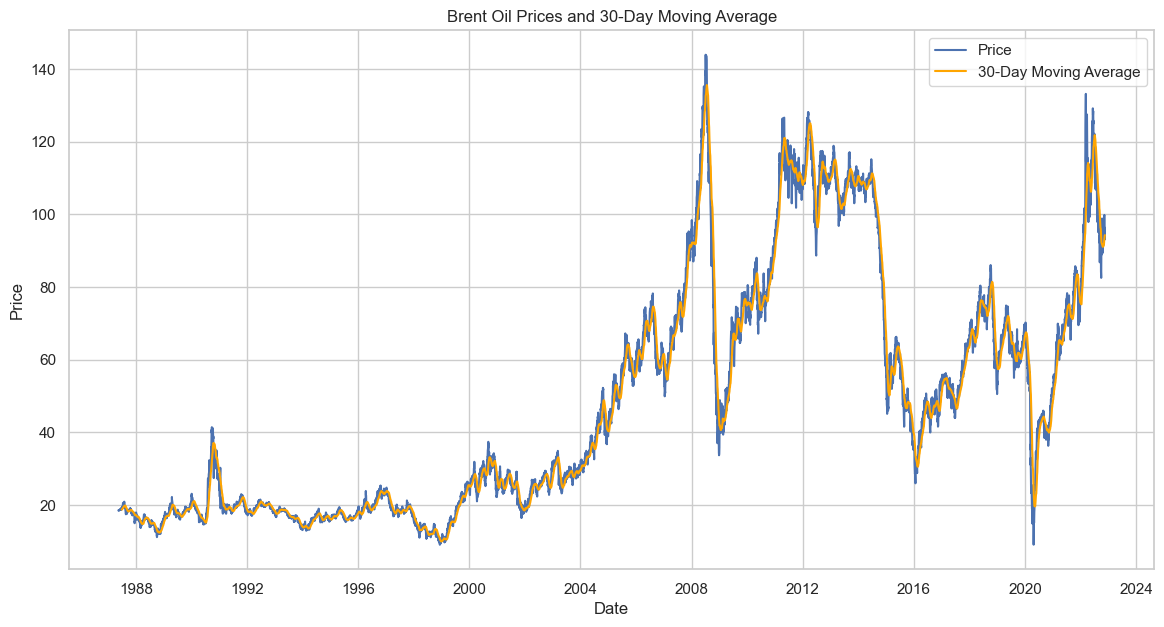

In [13]:
# Calculate and plot the moving average of oil prices
data_clean['Price_MA30'] = data_clean['Price'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(data_clean['Date'], data_clean['Price'], label='Price')
plt.plot(data_clean['Date'], data_clean['Price_MA30'], label='30-Day Moving Average', color='orange')
plt.title('Brent Oil Prices and 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()